In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config inlineBackend.figure_format = 'retina'

In [5]:
url = 'https://github.com/prasertcbs/basic-dataset/raw/master/ISLR/Auto.csv'

mpg = น้ำมัน

In [6]:
df = pd.read_csv(url,na_values='?')
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
279,29.5,4,98.0,68.0,2135,16.6,78,3,honda accord lx
206,26.5,4,140.0,72.0,2565,13.6,76,1,ford pinto
177,23.0,4,115.0,95.0,2694,15.0,75,2,audi 100ls
259,20.8,6,200.0,85.0,3070,16.7,78,1,mercury zephyr
12,15.0,8,400.0,150.0,3761,9.5,70,1,chevrolet monte carlo
283,20.2,6,232.0,90.0,3265,18.2,79,1,amc concord dl 6
252,19.2,6,231.0,105.0,3535,19.2,78,1,pontiac phoenix lj
153,18.0,6,250.0,105.0,3459,16.0,75,1,chevrolet nova
382,38.0,4,91.0,67.0,1965,15.0,82,3,honda civic
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [8]:
df.dropna(inplace=True)

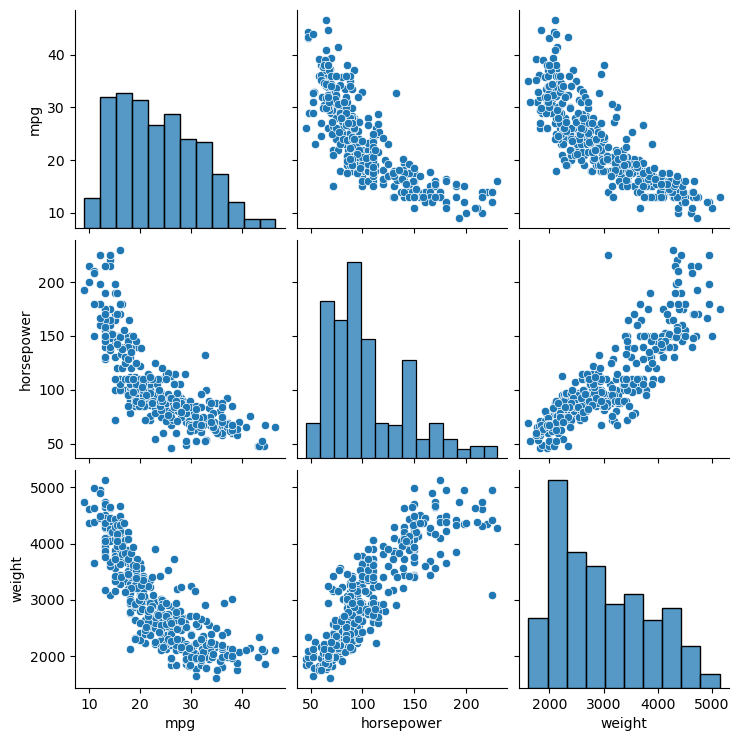

In [10]:
sns.pairplot(df[['mpg','horsepower','weight']])

In [12]:
df[['mpg','horsepower','weight']].corr()

,mpg,horsepower,weight
mpg,1.000000,-0.778427,-0.832244
horsepower,-0.778427,1.000000,0.864538
weight,-0.832244,0.864538,1.000000


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [14]:
x_col = ['horsepower','weight']
y_col = 'mpg'

In [15]:
X = df[x_col]
y = df[y_col]

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [17]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [18]:
lm.intercept_,lm.coef_

(44.822470583215576, array([-0.04898144, -0.00553451]))

In [19]:
lm.score(x_train,y_train) # R-squared

0.6932437089290188

In [20]:
lm.score(x_test,y_test) # R-squared

0.7292547386704167

In [22]:
poly = PolynomialFeatures(degree=2,include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)
pm = LinearRegression()
pm.fit(x_train_poly,y_train)

LinearRegression()

In [23]:
poly.get_params()

{'degree': 2, 'include_bias': True, 'interaction_only': False, 'order': 'C'}

In [25]:
x_train[:3]

,horsepower,weight
335,88.0,2500
396,82.0,2720
393,52.0,2130


In [24]:
x_train_poly[:3]

array([[1.0000e+00, 8.8000e+01, 2.5000e+03, 7.7440e+03, 2.2000e+05,
        6.2500e+06],
       [1.0000e+00, 8.2000e+01, 2.7200e+03, 6.7240e+03, 2.2304e+05,
        7.3984e+06],
       [1.0000e+00, 5.2000e+01, 2.1300e+03, 2.7040e+03, 1.1076e+05,
        4.5369e+06]])

In [26]:
poly.get_feature_names()

C:\Users\chopp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [27]:
pm.intercept_,pm.coef_

(60.99963811976515,
 array([ 0.00000000e+00, -2.71309036e-01, -8.77290010e-03,  2.15169279e-04,
         4.22566829e-05, -3.58954388e-08]))

In [28]:
pm.score(x_train_poly,y_train)

0.7344640327916465

In [29]:
pm.score(x_test_poly,y_test)

0.7734567578489351

In [30]:
x_test[:3]

,horsepower,weight
82,97.0,2506
167,75.0,2171
356,75.0,2350


In [33]:
pm.coef_

array([ 0.00000000e+00, -2.71309036e-01, -8.77290010e-03,  2.15169279e-04,
        4.22566829e-05, -3.58954388e-08])

In [31]:
x_test_poly[:3]

array([[1.000000e+00, 9.700000e+01, 2.506000e+03, 9.409000e+03,
        2.430820e+05, 6.280036e+06],
       [1.000000e+00, 7.500000e+01, 2.171000e+03, 5.625000e+03,
        1.628250e+05, 4.713241e+06],
       [1.000000e+00, 7.500000e+01, 2.350000e+03, 5.625000e+03,
        1.762500e+05, 5.522500e+06]])

In [32]:
pm.intercept_+sum((pm.coef_* x_test_poly[0]))

24.768716059040564

In [34]:
lm.predict(x_test[:3])

array([26.20179173, 29.13344391, 28.14276685])

In [36]:
pm.predict(x_test_poly[:3])

array([24.76871606, 29.52708203, 28.49498017])

In [37]:
y_test[:3]

82     23.0
167    29.0
356    32.4
Name: mpg, dtype: float64

In [38]:
pm.predict(poly.fit_transform([[97,2506]]))

array([24.76871606])

In [40]:
lm.predict([[97,2506]])

C:\Users\chopp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([26.20179173])

In [41]:
pm.predict(x_test_poly[:3])

array([24.76871606, 29.52708203, 28.49498017])

### Pipeline

In [46]:
from sklearn.pipeline import make_pipeline
degree = 2
pm2 = make_pipeline(PolynomialFeatures(degree),LinearRegression(),verbose=True)
pm2.fit(x_train,y_train)

[Pipeline]  (step 1 of 2) Processing polynomialfeatures, total=   0.0s
[Pipeline] .. (step 2 of 2) Processing linearregression, total=   0.0s


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())],
         verbose=True)

In [44]:
pm2.get_params()

{'memory': None,
 'steps': [('polynomialfeatures', PolynomialFeatures()),
  ('linearregression', LinearRegression())],
 'verbose': True,
 'polynomialfeatures': PolynomialFeatures(),
 'linearregression': LinearRegression(),
 'polynomialfeatures__degree': 2,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'linearregression__copy_X': True,
 'linearregression__fit_intercept': True,
 'linearregression__n_jobs': None,
 'linearregression__normalize': 'deprecated',
 'linearregression__positive': False}

In [47]:
pm2.score(x_train,y_train)

0.7344640327916465

In [48]:
pm2.score(x_test,y_test)

0.7734567578489351

In [49]:
x_test[:3]

,horsepower,weight
82,97.0,2506
167,75.0,2171
356,75.0,2350


In [50]:
pm2.predict(x_test[:3])

array([24.76871606, 29.52708203, 28.49498017])

In [52]:
pm2.predict([[97,2506]])

C:\Users\chopp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([24.76871606])

### Stats Models

In [54]:
dt = x_train.copy()
dt[y_col] = y_train
dt[:5]

,horsepower,weight,mpg
335,88.0,2500,35.0
396,82.0,2720,31.0
393,52.0,2130,44.0
29,88.0,2130,27.0
275,125.0,3140,17.0


In [61]:
poly.get_feature_names()

C:\Users\chopp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [73]:
import statsmodels.formula.api as smf
formula = 'mpg~horsepower+weight+I(horsepower**2)+horsepower*weight+I(weight**2)'
model1 = smf.ols(formula = formula,data=dt)
model1_fit = model1.fit()

In [74]:
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     148.3
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           5.09e-75
Time:                        16:59:48   Log-Likelihood:                -764.10
No. Observations:                 274   AIC:                             1540.
Df Residuals:                     268   BIC:                             1562.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             60.9996      3.604     16.924      0.000      53.903      68.096
horsepower            -0.2713      0.073     -3.713      0.000      -0.415      -0.127
weight                -0.0088      0.004     -2.252      0.025      -0.016      -0.001
I(horsepower ** 2)     0.0002      0.000      0.483      0.630      -0.001       0.001
horsepower:weight   4.226e-05   4.62e-05      0.915      0.361   -4.87e-05       0.000
I(weight ** 2)      -3.59e-08   1.29e-06     -0.028      0.978   -2.58e-06     2.5e-06
==============================================================================
Omnibus:                       18.453   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.334
Skew:                           0.470   Prob(JB):                     1.91e-06
Kurtosis:                       4.194   Cond. No.                     1.64e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
pm.intercept_,pm.coef_

(60.99963811976515,
 array([ 0.00000000e+00, -2.71309036e-01, -8.77290010e-03,  2.15169279e-04,
         4.22566829e-05, -3.58954388e-08]))

### method2 (use sm.OLS)

In [75]:
x_train_poly[:3]

array([[1.0000e+00, 8.8000e+01, 2.5000e+03, 7.7440e+03, 2.2000e+05,
        6.2500e+06],
       [1.0000e+00, 8.2000e+01, 2.7200e+03, 6.7240e+03, 2.2304e+05,
        7.3984e+06],
       [1.0000e+00, 5.2000e+01, 2.1300e+03, 2.7040e+03, 1.1076e+05,
        4.5369e+06]])

In [76]:
import statsmodels.api as sm
model2 = sm.OLS(y_train,x_train_poly)
model2_fit = model2.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     148.3
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           5.09e-75
Time:                        17:02:57   Log-Likelihood:                -764.10
No. Observations:                 274   AIC:                             1540.
Df Residuals:                     268   BIC:                             1562.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.9996      3.604     16.924      0.000      53.903      68.096
x1            -0.2713      0.073     -3.713      0.000      -0.415      -0.127
x2            -0.0088      0.004     -2.252      0.025      -0.016      -0.001
x3             0.0002      0.000      0.483      0.630      -0.001       0.001
x4          4.226e-05   4.62e-05      0.915      0.361   -4.87e-05       0.000
x5          -3.59e-08   1.29e-06     -0.028      0.978   -2.58e-06     2.5e-06
==============================================================================
Omnibus:                       18.453   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.334
Skew:                           0.470   Prob(JB):                     1.91e-06
Kurtosis:                       4.194   Cond. No.                     1.64e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
model2_fit.predict(x_test_poly[:3])

array([24.76871606, 29.52708203, 28.49498017])

In [86]:
model2_fit.predict(poly.fit_transform([[97,2506]]))

array([24.76871606])

In [84]:
model1_fit.predict(x_test[:3])

82     24.768716
167    29.527082
356    28.494980
dtype: float64

In [79]:
pm.predict(x_test_poly[:3])

array([24.76871606, 29.52708203, 28.49498017])

In [80]:
pm2.predict(x_test[:3])

array([24.76871606, 29.52708203, 28.49498017])

In [87]:
pm2.predict([[97,2506]])

C:\Users\chopp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([24.76871606])

ERROR! Session/line number was not unique in database. History logging moved to new session 367
